# HOUSE PRICES: Advanced regression techniques

Join the Kaggle competition titled: “House Prices - Advanced Regression Techniques” (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=test.csv) 
We aim to predict the sales price of the houses based on the features given in the data set.


In [42]:
# Import the librairies
import pandas as pd
import matplotlib.pyplot as lt
import seaborn as sns
import numpy as np

## Data preprocessing: Training data
* Cleaning the data
* Feature engineering

In [43]:
df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [44]:
df.shape

(1460, 81)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [46]:
# To check the sum of missing values for each features
# Features with lots of missing values will be dropped
# Consider also domain expert knowledge
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

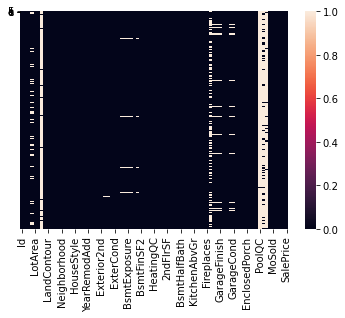

In [47]:
# To check the missing values of the features
# From the heatmap we cn sea that PoolQc, MoSold and other have high missing values
sns.heatmap(df.isnull(),yticklabels='False',cbar='False')

In [48]:
# Filling the missing values: Replacng values by their mean or objects by their modes (most frequent categories)
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode([0]))
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode([0]))
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode([0]))
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode([0]))
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode([0]))
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode([0]))
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode([0]))
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode([0]))
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode([0]))
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode([0]))
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode([0]))

In [49]:
# Dropping some entries: perform for features with at leat 50% null values
df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','Id'],axis=1,inplace=True)
df.shape

(1460, 75)

<AxesSubplot:>

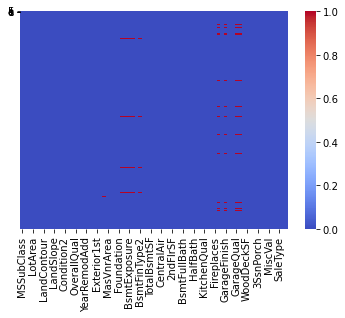

In [50]:
# Observed the clean data
sns.heatmap(df.isnull(),yticklabels='False',cbar='False',cmap='coolwarm')

In [51]:
#df.dropna(inplace=True)
df.shape

(1460, 75)

In [52]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [53]:
#df.info()

## Import cleantest.csv

In [54]:
test_df=pd.read_csv('cleantest.csv')
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [55]:
# Concatenate the training set and cleantest set into one whole data set
data_df=pd.concat([df,test_df],axis=0)

In [56]:
data_df.shape

(2919, 75)

In [57]:
# Isolate all the categorigal features in the data set to peform one hot encoding
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2',
            'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond',
            'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC',
            'CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond',
            'PavedDrive','SaleType','SaleCondition']

In [58]:
# one hot encoding
one_hot_encoded_data = pd.get_dummies(data_df, columns) 
one_hot_encoded_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [59]:
one_hot_encoded_data.shape

(2919, 271)

In [60]:
final_df=one_hot_encoded_data.loc[:,~one_hot_encoded_data.columns.duplicated()]

In [61]:
one_hot_encoded_data.shape

(2919, 271)

In [62]:
# Devide the final_df into train and test
df_Train=final_df.iloc[:1459,:]
df_Test=final_df.iloc[:1459,:]

In [63]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\amankou anicet\AppData\Local\Temp\ipykernel_25480\3985304647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Test.drop(['SalePrice'],axis=1,inplace=True)


In [64]:
# Define the y_train and x_train
x_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [65]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
model_=XGBRegressor()
model_.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [66]:
import pickle
filename='final_model.pkl'
pickle.dump(model_,open(filename,'wb'))

In [67]:
y_pred= model_.predict(df_Test)

In [68]:
y_pred

array([206668.78, 181397.67, 221602.7 , ..., 206982.06, 267375.28,
       141967.03], dtype=float32)

In [69]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission2.csv',index=False)

In [70]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [80]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 64,activation='relu'))

# Adding the second hidden layer
classifier.add(Dense(units = 32,activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(units = 16,activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1))

# Compiling the ANN
classifier.compile(loss='mean_squared_error', optimizer='AdamaX')

# Fitting the ANN to the Training set
model_history=classifier.fit(x_train.values, y_train.values,validation_split=0.20, batch_size = 10, epochs = 1500)

Epoch 1/1500
117/117 [==============================] - 1s 2ms/step - loss: 36095909888.0000 - val_loss: 31754485760.0000
Epoch 2/1500
117/117 [==============================] - 0s 2ms/step - loss: 18876540928.0000 - val_loss: 8041165824.0000
Epoch 3/1500
117/117 [==============================] - 0s 2ms/step - loss: 8441314304.0000 - val_loss: 5951518208.0000
Epoch 4/1500
117/117 [==============================] - 0s 2ms/step - loss: 7583610880.0000 - val_loss: 5757127680.0000
Epoch 5/1500
117/117 [==============================] - 0s 1ms/step - loss: 7171104256.0000 - val_loss: 5594067456.0000
Epoch 6/1500
117/117 [==============================] - 0s 1ms/step - loss: 6847462912.0000 - val_loss: 5495401472.0000
Epoch 7/1500
117/117 [==============================] - 0s 1ms/step - loss: 6597135872.0000 - val_loss: 5409136128.0000
Epoch 8/1500
117/117 [==============================] - 0s 1ms/step - loss: 6325801984.0000 - val_loss: 5317660672.0000
Epoch 9/1500
117/117 [===============

Epoch 69/1500
117/117 [==============================] - 0s 1ms/step - loss: 1554988288.0000 - val_loss: 3652160768.0000
Epoch 70/1500
117/117 [==============================] - 0s 1ms/step - loss: 1531523840.0000 - val_loss: 3603024128.0000
Epoch 71/1500
117/117 [==============================] - 0s 1ms/step - loss: 1533301632.0000 - val_loss: 3554979328.0000
Epoch 72/1500
117/117 [==============================] - 0s 1ms/step - loss: 1539530752.0000 - val_loss: 3659456000.0000
Epoch 73/1500
117/117 [==============================] - 0s 1ms/step - loss: 1531696640.0000 - val_loss: 3557751040.0000
Epoch 74/1500
117/117 [==============================] - 0s 1ms/step - loss: 1542973056.0000 - val_loss: 3669411328.0000
Epoch 75/1500
117/117 [==============================] - 0s 1ms/step - loss: 1526779904.0000 - val_loss: 3591504640.0000
Epoch 76/1500
117/117 [==============================] - 0s 2ms/step - loss: 1529653376.0000 - val_loss: 3563977216.0000
Epoch 77/1500
117/117 [=========

117/117 [==============================] - 0s 1ms/step - loss: 1439883392.0000 - val_loss: 3615168768.0000
Epoch 137/1500
117/117 [==============================] - 0s 1ms/step - loss: 1445332736.0000 - val_loss: 3647799808.0000
Epoch 138/1500
117/117 [==============================] - 0s 1ms/step - loss: 1436519040.0000 - val_loss: 3603090688.0000
Epoch 139/1500
117/117 [==============================] - 0s 1ms/step - loss: 1442853632.0000 - val_loss: 3576610048.0000
Epoch 140/1500
117/117 [==============================] - 0s 1ms/step - loss: 1432791808.0000 - val_loss: 3602892544.0000
Epoch 141/1500
117/117 [==============================] - 0s 1ms/step - loss: 1431591296.0000 - val_loss: 3699983360.0000
Epoch 142/1500
117/117 [==============================] - 0s 1ms/step - loss: 1434343040.0000 - val_loss: 3589551616.0000
Epoch 143/1500
117/117 [==============================] - 0s 1ms/step - loss: 1422535680.0000 - val_loss: 3558215936.0000
Epoch 144/1500
117/117 [===============

117/117 [==============================] - 0s 2ms/step - loss: 1324533120.0000 - val_loss: 3694820352.0000
Epoch 204/1500
117/117 [==============================] - 0s 2ms/step - loss: 1335769728.0000 - val_loss: 3699137536.0000
Epoch 205/1500
117/117 [==============================] - 0s 1ms/step - loss: 1320763264.0000 - val_loss: 3753932032.0000
Epoch 206/1500
117/117 [==============================] - 0s 2ms/step - loss: 1319397632.0000 - val_loss: 3725957888.0000
Epoch 207/1500
117/117 [==============================] - 0s 2ms/step - loss: 1304673024.0000 - val_loss: 3649479680.0000
Epoch 208/1500
117/117 [==============================] - 0s 2ms/step - loss: 1317850112.0000 - val_loss: 3796382464.0000
Epoch 209/1500
117/117 [==============================] - 0s 2ms/step - loss: 1313245312.0000 - val_loss: 3719833344.0000
Epoch 210/1500
117/117 [==============================] - 0s 1ms/step - loss: 1316210560.0000 - val_loss: 3851410688.0000
Epoch 211/1500
117/117 [===============

117/117 [==============================] - 0s 2ms/step - loss: 1236163712.0000 - val_loss: 3726513920.0000
Epoch 271/1500
117/117 [==============================] - 0s 2ms/step - loss: 1238205056.0000 - val_loss: 3701316864.0000
Epoch 272/1500
117/117 [==============================] - 0s 2ms/step - loss: 1230014848.0000 - val_loss: 3735955968.0000
Epoch 273/1500
117/117 [==============================] - 0s 2ms/step - loss: 1227297280.0000 - val_loss: 3666251264.0000
Epoch 274/1500
117/117 [==============================] - 0s 2ms/step - loss: 1227519232.0000 - val_loss: 3780335104.0000
Epoch 275/1500
117/117 [==============================] - 0s 2ms/step - loss: 1229527040.0000 - val_loss: 3795560192.0000
Epoch 276/1500
117/117 [==============================] - 0s 2ms/step - loss: 1232715136.0000 - val_loss: 3736148992.0000
Epoch 277/1500
117/117 [==============================] - 0s 1ms/step - loss: 1228615552.0000 - val_loss: 3742871808.0000
Epoch 278/1500
117/117 [===============

117/117 [==============================] - 0s 1ms/step - loss: 1142360064.0000 - val_loss: 3725563648.0000
Epoch 338/1500
117/117 [==============================] - 0s 1ms/step - loss: 1152394496.0000 - val_loss: 3648240896.0000
Epoch 339/1500
117/117 [==============================] - 0s 1ms/step - loss: 1148173312.0000 - val_loss: 3645588224.0000
Epoch 340/1500
117/117 [==============================] - 0s 1ms/step - loss: 1147976320.0000 - val_loss: 3693575936.0000
Epoch 341/1500
117/117 [==============================] - 0s 1ms/step - loss: 1139701760.0000 - val_loss: 3717764096.0000
Epoch 342/1500
117/117 [==============================] - 0s 1ms/step - loss: 1143314048.0000 - val_loss: 3714534144.0000
Epoch 343/1500
117/117 [==============================] - 0s 1ms/step - loss: 1145997184.0000 - val_loss: 3656715008.0000
Epoch 344/1500
117/117 [==============================] - 0s 1ms/step - loss: 1141048320.0000 - val_loss: 3657009408.0000
Epoch 345/1500
117/117 [===============

117/117 [==============================] - 0s 1ms/step - loss: 1065599104.0000 - val_loss: 3546490112.0000
Epoch 405/1500
117/117 [==============================] - 0s 2ms/step - loss: 1083550080.0000 - val_loss: 3595065600.0000
Epoch 406/1500
117/117 [==============================] - 0s 1ms/step - loss: 1057410752.0000 - val_loss: 3525689088.0000
Epoch 407/1500
117/117 [==============================] - 0s 1ms/step - loss: 1081504000.0000 - val_loss: 3609123072.0000
Epoch 408/1500
117/117 [==============================] - 0s 1ms/step - loss: 1067791040.0000 - val_loss: 3548678400.0000
Epoch 409/1500
117/117 [==============================] - 0s 1ms/step - loss: 1063537216.0000 - val_loss: 3644695296.0000
Epoch 410/1500
117/117 [==============================] - 0s 1ms/step - loss: 1065598976.0000 - val_loss: 3566234368.0000
Epoch 411/1500
117/117 [==============================] - 0s 1ms/step - loss: 1071961600.0000 - val_loss: 3505042688.0000
Epoch 412/1500
117/117 [===============

117/117 [==============================] - 0s 1ms/step - loss: 1012972608.0000 - val_loss: 3365687808.0000
Epoch 472/1500
117/117 [==============================] - 0s 1ms/step - loss: 1021823808.0000 - val_loss: 3450664704.0000
Epoch 473/1500
117/117 [==============================] - 0s 2ms/step - loss: 1007468800.0000 - val_loss: 3443913984.0000
Epoch 474/1500
117/117 [==============================] - 0s 2ms/step - loss: 1016523584.0000 - val_loss: 3419694080.0000
Epoch 475/1500
117/117 [==============================] - 0s 2ms/step - loss: 1009181824.0000 - val_loss: 3477546496.0000
Epoch 476/1500
117/117 [==============================] - 0s 2ms/step - loss: 1003977472.0000 - val_loss: 3465403136.0000
Epoch 477/1500
117/117 [==============================] - 0s 2ms/step - loss: 1017788096.0000 - val_loss: 3446526208.0000
Epoch 478/1500
117/117 [==============================] - 0s 2ms/step - loss: 1006451264.0000 - val_loss: 3494889216.0000
Epoch 479/1500
117/117 [===============

117/117 [==============================] - 0s 1ms/step - loss: 954701376.0000 - val_loss: 3451184640.0000
Epoch 539/1500
117/117 [==============================] - 0s 1ms/step - loss: 955200192.0000 - val_loss: 3311879424.0000
Epoch 540/1500
117/117 [==============================] - 0s 1ms/step - loss: 947771776.0000 - val_loss: 3374071040.0000
Epoch 541/1500
117/117 [==============================] - 0s 1ms/step - loss: 953727040.0000 - val_loss: 3295247616.0000
Epoch 542/1500
117/117 [==============================] - 0s 1ms/step - loss: 957558656.0000 - val_loss: 3353860352.0000
Epoch 543/1500
117/117 [==============================] - 0s 1ms/step - loss: 943045376.0000 - val_loss: 3229035776.0000
Epoch 544/1500
117/117 [==============================] - 0s 1ms/step - loss: 949029440.0000 - val_loss: 3348980224.0000
Epoch 545/1500
117/117 [==============================] - 0s 1ms/step - loss: 943815104.0000 - val_loss: 3292037376.0000
Epoch 546/1500
117/117 [=======================

Epoch 606/1500
117/117 [==============================] - 0s 1ms/step - loss: 895891392.0000 - val_loss: 3116296448.0000
Epoch 607/1500
117/117 [==============================] - 0s 1ms/step - loss: 898265024.0000 - val_loss: 3189343232.0000
Epoch 608/1500
117/117 [==============================] - 0s 1ms/step - loss: 891055488.0000 - val_loss: 3233686528.0000
Epoch 609/1500
117/117 [==============================] - 0s 1ms/step - loss: 891643648.0000 - val_loss: 3138295296.0000
Epoch 610/1500
117/117 [==============================] - 0s 1ms/step - loss: 883415488.0000 - val_loss: 3135330304.0000
Epoch 611/1500
117/117 [==============================] - 0s 1ms/step - loss: 882875072.0000 - val_loss: 3001572864.0000
Epoch 612/1500
117/117 [==============================] - 0s 1ms/step - loss: 886889792.0000 - val_loss: 3157195264.0000
Epoch 613/1500
117/117 [==============================] - 0s 1ms/step - loss: 889617152.0000 - val_loss: 3063074816.0000
Epoch 614/1500
117/117 [========

117/117 [==============================] - 0s 1ms/step - loss: 852473024.0000 - val_loss: 2954605056.0000
Epoch 674/1500
117/117 [==============================] - 0s 1ms/step - loss: 855416896.0000 - val_loss: 3083480064.0000
Epoch 675/1500
117/117 [==============================] - 0s 2ms/step - loss: 842260096.0000 - val_loss: 2985097728.0000
Epoch 676/1500
117/117 [==============================] - 0s 2ms/step - loss: 831599936.0000 - val_loss: 2846277632.0000
Epoch 677/1500
117/117 [==============================] - 0s 1ms/step - loss: 840170688.0000 - val_loss: 2937329408.0000
Epoch 678/1500
117/117 [==============================] - 0s 1ms/step - loss: 828375552.0000 - val_loss: 3031741696.0000
Epoch 679/1500
117/117 [==============================] - 0s 1ms/step - loss: 850849216.0000 - val_loss: 3102880000.0000
Epoch 680/1500
117/117 [==============================] - 0s 1ms/step - loss: 836229504.0000 - val_loss: 3000151552.0000
Epoch 681/1500
117/117 [=======================

Epoch 741/1500
117/117 [==============================] - 0s 1ms/step - loss: 797859392.0000 - val_loss: 2814713600.0000
Epoch 742/1500
117/117 [==============================] - 0s 2ms/step - loss: 791123584.0000 - val_loss: 2781031936.0000
Epoch 743/1500
117/117 [==============================] - 0s 1ms/step - loss: 795597632.0000 - val_loss: 2764518656.0000
Epoch 744/1500
117/117 [==============================] - 0s 1ms/step - loss: 788305536.0000 - val_loss: 2839099136.0000
Epoch 745/1500
117/117 [==============================] - 0s 1ms/step - loss: 781852992.0000 - val_loss: 2770573312.0000
Epoch 746/1500
117/117 [==============================] - 0s 1ms/step - loss: 792630208.0000 - val_loss: 2722238976.0000
Epoch 747/1500
117/117 [==============================] - 0s 1ms/step - loss: 777705408.0000 - val_loss: 2795533568.0000
Epoch 748/1500
117/117 [==============================] - 0s 1ms/step - loss: 787053440.0000 - val_loss: 2780433152.0000
Epoch 749/1500
117/117 [========

117/117 [==============================] - 0s 1ms/step - loss: 744345792.0000 - val_loss: 2640960768.0000
Epoch 809/1500
117/117 [==============================] - 0s 1ms/step - loss: 738781760.0000 - val_loss: 2522447360.0000
Epoch 810/1500
117/117 [==============================] - 0s 1ms/step - loss: 737954752.0000 - val_loss: 2573659648.0000
Epoch 811/1500
117/117 [==============================] - 0s 1ms/step - loss: 730377984.0000 - val_loss: 2571422208.0000
Epoch 812/1500
117/117 [==============================] - 0s 1ms/step - loss: 739871424.0000 - val_loss: 2542535680.0000
Epoch 813/1500
117/117 [==============================] - 0s 1ms/step - loss: 731558400.0000 - val_loss: 2589456384.0000
Epoch 814/1500
117/117 [==============================] - 0s 1ms/step - loss: 733665408.0000 - val_loss: 2681332480.0000
Epoch 815/1500
117/117 [==============================] - 0s 1ms/step - loss: 740404736.0000 - val_loss: 2638792192.0000
Epoch 816/1500
117/117 [=======================

Epoch 876/1500
117/117 [==============================] - 0s 2ms/step - loss: 692541120.0000 - val_loss: 2374133248.0000
Epoch 877/1500
117/117 [==============================] - 0s 1ms/step - loss: 703194688.0000 - val_loss: 2357898752.0000
Epoch 878/1500
117/117 [==============================] - 0s 1ms/step - loss: 689248320.0000 - val_loss: 2403713536.0000
Epoch 879/1500
117/117 [==============================] - 0s 1ms/step - loss: 706122624.0000 - val_loss: 2351929600.0000
Epoch 880/1500
117/117 [==============================] - 0s 1ms/step - loss: 692235776.0000 - val_loss: 2320370432.0000
Epoch 881/1500
117/117 [==============================] - 0s 1ms/step - loss: 706699776.0000 - val_loss: 2387955200.0000
Epoch 882/1500
117/117 [==============================] - 0s 1ms/step - loss: 701213568.0000 - val_loss: 2326822656.0000
Epoch 883/1500
117/117 [==============================] - 0s 1ms/step - loss: 704896576.0000 - val_loss: 2326716416.0000
Epoch 884/1500
117/117 [========

117/117 [==============================] - 0s 2ms/step - loss: 667433600.0000 - val_loss: 2298922496.0000
Epoch 944/1500
117/117 [==============================] - 0s 2ms/step - loss: 664175488.0000 - val_loss: 2207003648.0000
Epoch 945/1500
117/117 [==============================] - 0s 2ms/step - loss: 653420352.0000 - val_loss: 2296302080.0000
Epoch 946/1500
117/117 [==============================] - 0s 2ms/step - loss: 658936000.0000 - val_loss: 2305304320.0000
Epoch 947/1500
117/117 [==============================] - 0s 1ms/step - loss: 658343232.0000 - val_loss: 2167010048.0000
Epoch 948/1500
117/117 [==============================] - 0s 2ms/step - loss: 665199104.0000 - val_loss: 2213294080.0000
Epoch 949/1500
117/117 [==============================] - 0s 2ms/step - loss: 652258688.0000 - val_loss: 2198706432.0000
Epoch 950/1500
117/117 [==============================] - 0s 2ms/step - loss: 648164288.0000 - val_loss: 2111341056.0000
Epoch 951/1500
117/117 [=======================

Epoch 1011/1500
117/117 [==============================] - 0s 2ms/step - loss: 619013056.0000 - val_loss: 2040847872.0000
Epoch 1012/1500
117/117 [==============================] - 0s 2ms/step - loss: 617963008.0000 - val_loss: 2113570176.0000
Epoch 1013/1500
117/117 [==============================] - 0s 1ms/step - loss: 614530752.0000 - val_loss: 2175860992.0000
Epoch 1014/1500
117/117 [==============================] - 0s 2ms/step - loss: 628265088.0000 - val_loss: 1981799936.0000
Epoch 1015/1500
117/117 [==============================] - 0s 2ms/step - loss: 621622336.0000 - val_loss: 2042439040.0000
Epoch 1016/1500
117/117 [==============================] - 0s 2ms/step - loss: 620628544.0000 - val_loss: 2044430720.0000
Epoch 1017/1500
117/117 [==============================] - 0s 2ms/step - loss: 617946944.0000 - val_loss: 2043702912.0000
Epoch 1018/1500
117/117 [==============================] - 0s 1ms/step - loss: 620810368.0000 - val_loss: 2076862336.0000
Epoch 1019/1500
117/117 

117/117 [==============================] - 0s 1ms/step - loss: 598696320.0000 - val_loss: 1946034688.0000
Epoch 1079/1500
117/117 [==============================] - 0s 1ms/step - loss: 583426304.0000 - val_loss: 1949988480.0000
Epoch 1080/1500
117/117 [==============================] - 0s 1ms/step - loss: 601449728.0000 - val_loss: 2021740288.0000
Epoch 1081/1500
117/117 [==============================] - 0s 1ms/step - loss: 590347136.0000 - val_loss: 1900032512.0000
Epoch 1082/1500
117/117 [==============================] - 0s 1ms/step - loss: 594059648.0000 - val_loss: 1921070464.0000
Epoch 1083/1500
117/117 [==============================] - 0s 1ms/step - loss: 575129280.0000 - val_loss: 1900521344.0000
Epoch 1084/1500
117/117 [==============================] - 0s 1ms/step - loss: 590971456.0000 - val_loss: 1921900032.0000
Epoch 1085/1500
117/117 [==============================] - 0s 1ms/step - loss: 590003456.0000 - val_loss: 1995691776.0000
Epoch 1086/1500
117/117 [===============

117/117 [==============================] - 0s 1ms/step - loss: 547406400.0000 - val_loss: 1970596992.0000
Epoch 1146/1500
117/117 [==============================] - 0s 2ms/step - loss: 556910336.0000 - val_loss: 1801656064.0000
Epoch 1147/1500
117/117 [==============================] - 0s 1ms/step - loss: 559140544.0000 - val_loss: 1855107712.0000
Epoch 1148/1500
117/117 [==============================] - 0s 1ms/step - loss: 557683712.0000 - val_loss: 1795952128.0000
Epoch 1149/1500
117/117 [==============================] - 0s 2ms/step - loss: 553084160.0000 - val_loss: 1936142592.0000
Epoch 1150/1500
117/117 [==============================] - 0s 1ms/step - loss: 550552704.0000 - val_loss: 1876747648.0000
Epoch 1151/1500
117/117 [==============================] - 0s 2ms/step - loss: 557511744.0000 - val_loss: 1879274880.0000
Epoch 1152/1500
117/117 [==============================] - 0s 1ms/step - loss: 562083904.0000 - val_loss: 1838170624.0000
Epoch 1153/1500
117/117 [===============

117/117 [==============================] - 0s 1ms/step - loss: 530441760.0000 - val_loss: 1736105856.0000
Epoch 1213/1500
117/117 [==============================] - 0s 1ms/step - loss: 529945376.0000 - val_loss: 1764436352.0000
Epoch 1214/1500
117/117 [==============================] - 0s 1ms/step - loss: 522382976.0000 - val_loss: 1714136832.0000
Epoch 1215/1500
117/117 [==============================] - 0s 1ms/step - loss: 538504576.0000 - val_loss: 1717800960.0000
Epoch 1216/1500
117/117 [==============================] - 0s 1ms/step - loss: 527241728.0000 - val_loss: 1747991808.0000
Epoch 1217/1500
117/117 [==============================] - 0s 1ms/step - loss: 524698912.0000 - val_loss: 1769880448.0000
Epoch 1218/1500
117/117 [==============================] - 0s 1ms/step - loss: 532033888.0000 - val_loss: 1785934720.0000
Epoch 1219/1500
117/117 [==============================] - 0s 1ms/step - loss: 534342144.0000 - val_loss: 1747946112.0000
Epoch 1220/1500
117/117 [===============

117/117 [==============================] - 0s 1ms/step - loss: 497867104.0000 - val_loss: 1719374848.0000
Epoch 1280/1500
117/117 [==============================] - 0s 1ms/step - loss: 502277408.0000 - val_loss: 1682893952.0000
Epoch 1281/1500
117/117 [==============================] - 0s 2ms/step - loss: 507414528.0000 - val_loss: 1659974016.0000
Epoch 1282/1500
117/117 [==============================] - 0s 2ms/step - loss: 502105888.0000 - val_loss: 1751408128.0000
Epoch 1283/1500
117/117 [==============================] - 0s 2ms/step - loss: 513497536.0000 - val_loss: 1636562688.0000
Epoch 1284/1500
117/117 [==============================] - 0s 1ms/step - loss: 495463968.0000 - val_loss: 1624264704.0000
Epoch 1285/1500
117/117 [==============================] - 0s 1ms/step - loss: 506240608.0000 - val_loss: 1787409792.0000
Epoch 1286/1500
117/117 [==============================] - 0s 1ms/step - loss: 506060576.0000 - val_loss: 1721313152.0000
Epoch 1287/1500
117/117 [===============

117/117 [==============================] - 0s 1ms/step - loss: 507178432.0000 - val_loss: 1649429248.0000
Epoch 1347/1500
117/117 [==============================] - 0s 1ms/step - loss: 477303072.0000 - val_loss: 1594827520.0000
Epoch 1348/1500
117/117 [==============================] - 0s 1ms/step - loss: 470244608.0000 - val_loss: 1660920064.0000
Epoch 1349/1500
117/117 [==============================] - 0s 1ms/step - loss: 485266240.0000 - val_loss: 1620955392.0000
Epoch 1350/1500
117/117 [==============================] - 0s 1ms/step - loss: 482194336.0000 - val_loss: 1597352192.0000
Epoch 1351/1500
117/117 [==============================] - 0s 1ms/step - loss: 472397088.0000 - val_loss: 1573645440.0000
Epoch 1352/1500
117/117 [==============================] - 0s 1ms/step - loss: 482248320.0000 - val_loss: 1600138496.0000
Epoch 1353/1500
117/117 [==============================] - 0s 1ms/step - loss: 490195680.0000 - val_loss: 1609971712.0000
Epoch 1354/1500
117/117 [===============

117/117 [==============================] - 0s 1ms/step - loss: 469194016.0000 - val_loss: 1684815744.0000
Epoch 1414/1500
117/117 [==============================] - 0s 1ms/step - loss: 470163392.0000 - val_loss: 1561710080.0000
Epoch 1415/1500
117/117 [==============================] - 0s 1ms/step - loss: 468504768.0000 - val_loss: 1617973888.0000
Epoch 1416/1500
117/117 [==============================] - 0s 1ms/step - loss: 491700544.0000 - val_loss: 1608881408.0000
Epoch 1417/1500
117/117 [==============================] - 0s 1ms/step - loss: 462030912.0000 - val_loss: 1624523648.0000
Epoch 1418/1500
117/117 [==============================] - 0s 1ms/step - loss: 460857088.0000 - val_loss: 1508412544.0000
Epoch 1419/1500
117/117 [==============================] - 0s 1ms/step - loss: 456597088.0000 - val_loss: 1569011200.0000
Epoch 1420/1500
117/117 [==============================] - 0s 1ms/step - loss: 467260224.0000 - val_loss: 1541752832.0000
Epoch 1421/1500
117/117 [===============

117/117 [==============================] - 0s 2ms/step - loss: 448145056.0000 - val_loss: 1550873856.0000
Epoch 1481/1500
117/117 [==============================] - 0s 2ms/step - loss: 446934528.0000 - val_loss: 1560310656.0000
Epoch 1482/1500
117/117 [==============================] - 0s 2ms/step - loss: 447866048.0000 - val_loss: 1508558464.0000
Epoch 1483/1500
117/117 [==============================] - 0s 2ms/step - loss: 468061344.0000 - val_loss: 1504316544.0000
Epoch 1484/1500
117/117 [==============================] - 0s 2ms/step - loss: 461949888.0000 - val_loss: 1507946368.0000
Epoch 1485/1500
117/117 [==============================] - 0s 2ms/step - loss: 458068096.0000 - val_loss: 1536460288.0000
Epoch 1486/1500
117/117 [==============================] - 0s 1ms/step - loss: 468945696.0000 - val_loss: 1508769280.0000
Epoch 1487/1500
117/117 [==============================] - 0s 1ms/step - loss: 474602656.0000 - val_loss: 1478513152.0000
Epoch 1488/1500
117/117 [===============

In [83]:
pred2=classifier.predict((df_Test).values)

46/46 [==============================] - 0s 897us/step


In [84]:
pred_=pd.DataFrame(pred2)
sub_df=pd.read_csv('sample_submission.csv')
datasets_=pd.concat([sub_df['Id'],pred_],axis=1)
datasets_.columns=['Id','SalePrice']
datasets_.to_csv('sample_submission3.csv',index=False)